# Data Visualization with Altair

### Overview

Altair adalah library untuk visualisasi statistik deklaratif pada Python, berdasarkan Vega dan Vega-Lite. Vega merupakan grammar visualisasi yang merupakan bahasa untuk membuat, menyimpan, dan membagikan desain visualisasi interaktif dalam format JSON dan menghasilkan tampilan berbasis web menggunakan Canvas atau SVG. Vega menyediakan berbagai jenis desain visualisasi dasar seperti data loading and transformation, scales, map projections, axes, legends, and graphical marks seperti rectangles, lines, plotting symbols, dsb. Sementara Vega-Lite merupakan high-level grammar untuk grafik yang interaktif. Vega-Lite menyediakan sintaks JSON singkat yang memudahkan visualisasi untuk kebutuhan analisis. Vega-Lite menggambarkan visualisasi sebagai pemetaan dari data ke properti graphical marks (mis., point atau bar). Vega-Lite secara otomatis menghasilkan komponen visualisasi seperti axis, legenda, dan skala. Pendekatan ini memungkinkan spesifikasi menjadi ringkas dan ekspresif, tetapi juga memberikan kontrol pengguna. Karena Vega-Lite dirancang untuk analisis, ia mendukung transformasi data seperti agregasi, binning, pemfilteran, pengurutan, dan transformasi visual termasuk stacking dan faceting. Selain itu, spesifikasi Vega-Lite dapat dikomposisikan menjadi tampilan berlapis dan multi-tampilan, dan dibuat interaktif dengan pilihan.

Dokumentasi:
- Altair : https://altair-viz.github.io/
- Vega : https://vega.github.io/vega/
- Vega-Lite : https://vega.github.io/vega-lite/


### Instalasi Altair

Untuk dapat menggunakan library Altair pada Notebook, kita dapat menambahkan perintah berikut:
- Instalasi dengan conda
    
    - $ conda install -c conda-forge altair vega_datasets jupyterlab

- Instalasi dengan pip
    
    - $ pip install -U altair vega_datasets jupyterlab
    
Untuk Jupyter Notebook, setiap kali kita meluncurkan notebook, kita harus secara eksplisit mengaktifkan rendering Altair dengan menjalankan:
    - alt.renderers.enable('notebook')

### Memulai Visualisasi dengan Altair

#### Data

Data dalam Altair dibangun berdasarkan Pandas Dataframe. Salah satu karakteristik yang menentukan dari visualisasi statistik adalah sebuah data dibangun dengan kerangka data yang rapi (tidy). Pada analsisi kali ini, saya menggunakan data penjualan video game yang diperoleh dari Kaggle dataset(https://www.kaggle.com/gregorut/videogamesales). Dataset ini merupakan data penjualan video game dengan penjualan lebih dari 100.000 eksemplar. Deskripsi dari setiap variabel yang ada pada dataset adalah sebagai berikut:
- Rank - Ranking pada keseluruhan penjualan
- Name - Nama games
- Platform - Platform dari game ketika dirilis (i.e. PC,PS4, etc.)
- Year - tahun game dirilis
- Genre - Genre games
- Publisher - Penerbit games
- NA_Sales - Penjualan di North America (juta)
- EU_Sales - Penjualan di Europe (juta)
- JP_Sales - Penjualan di Japan (juta)
- Other_Sales - Penjualan di seluruh dunia (juta)
- Global_Sales - Total penjualan di seluruh dunia.

##### Inspkesi Data

In [2]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
vgame = pd.read_csv("vgsales.csv")
vgame.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [5]:
vgame.shape

(16598, 11)

Dataset video game yang saya gunakan terdiri dari 16598 observasi dengan jumlah variabel/kolom sebanyak 11.

In [6]:
vgame.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Dari inspeksi missing value di atas, terdapat missing value pada kolom Year dan Publisher. Missing value tersebut kemudian saya drop dari dataset.

In [8]:
vgame.dropna(inplace=True)
vgame.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [80]:
vgame.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Dari hasil inspeksi tipe data di atas, dapat dilihat bahwa masih ada variabel yang tersimpan dengan format tipe data yang kurang tepat yaitu pada variabel platform, genre, publisher, dan year. Oleh karena itu, perlu dilakukan perbaikan dengan mengganti tipe data ke tipe data semestinya.

In [9]:
vgame[['Platform','Genre','Publisher']] = vgame[['Platform','Genre','Publisher']].astype('category')
vgame['Year'] = vgame['Year'].astype('int')

##### Eksplorasi Data

Setelah data bersih, maka tahap selanjutnya yang dpat dilakukan adalah memulai untuk eksplorasi data. Eksplorasi data dilakukan untuk mencari insight apa yang dapat ditampilkan sebagai informasi besar dari sebuah data. Pertama kita coba lihat sebaran penjualan video game berdasarkan genre.

In [82]:
vgame['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

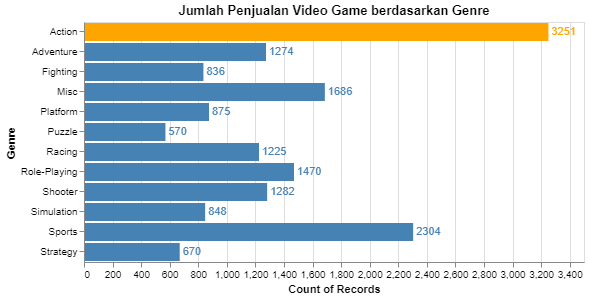

In [10]:
alt.data_transformers.disable_max_rows()
bars = alt.Chart(vgame).mark_bar().encode(
    y = 'Genre',
    x = 'count()',
    color=alt.condition(
        alt.datum.Genre == 'Action',  
        alt.value('orange'),     
        alt.value('steelblue')  
    )
)
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count()'
)

(bars+text).properties(width=500, 
                       title='Jumlah Penjualan Video Game berdasarkan Genre')

Ketika kode di atas dijalankan tanpa sintaks "alt.data_transformers.disable_max_rows()", maka notebook tidak akan mengeluarkan hasil render chart dikarenakan secara default Altair membatasi data yang dapat divisualisasikan adalah sekitar 5000 observasi. Jika ternyata observasi lebih dari 5000, maka Altair menganggap bahwa dataset tersebut adalah datase yang besar. Ini bukan karena Altair tidak dapat menangani kumpulan data yang lebih besar, tetapi karena penting bagi pengguna untuk memikirkan dengan cermat tentang bagaimana kumpulan data besar ditangani.

Dari bar chart di atas, kita dapat melihat bahwa penjualan game paling banyak dilihat dari Genre adalah pada Genre Action. Hal ini kemudian dapat kita tinjau kembali apakah Genre Action memang populer di berbagai negara atau genre Action juga menghasilkan total penjualn yang tinggi pada suatu negara setiap tahunnya.

###### Top 10 Video Game berdasarkan Ranking

In [84]:
top10rank = vgame.head(10)

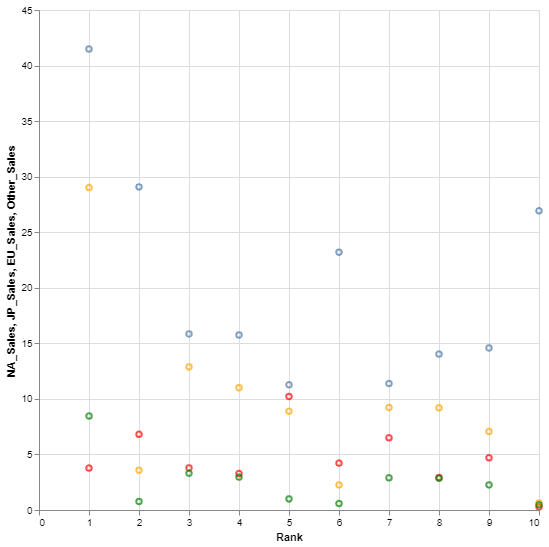

In [85]:
NA_sales = alt.Chart(top10rank).mark_point().encode(
    y = 'NA_Sales',
    x = 'Rank',
    tooltip=['Name','NA_Sales','Genre','Publisher','Platform']
    )
JP_Sales = alt.Chart(top10rank).mark_point(color='red').encode(
    y = 'JP_Sales',
    x = 'Rank',
    tooltip=['Name','JP_Sales','Genre','Publisher','Platform']
    )
EU_Sales = alt.Chart(top10rank).mark_point(color='orange').encode(
    y = 'EU_Sales',
    x = 'Rank',
    tooltip=['Name','EU_Sales','Genre','Publisher','Platform']
    )
Other = alt.Chart(top10rank).mark_point(color='green').encode(
    y = 'Other_Sales',
    x = 'Rank',
    tooltip=['Name','Other_Sales','Genre','Publisher','Platform']
    )
(NA_sales+JP_Sales+EU_Sales+Other).properties(width=500,height=500)

###### Rata-rata Sales vs Genre di setiap Region

In [12]:
genre_list=list(vgame.Genre.unique())
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]
global_sales=[]
for i in genre_list:
    val=vgame[vgame.Genre==i]
    na_sales.append(val.NA_Sales.sum())
    eu_sales.append(val.EU_Sales.sum())
    jp_sales.append(val.JP_Sales.sum())
    other_sales.append(val.Other_Sales.sum())

df = pd.DataFrame({"Genre":genre_list,"NA_Sales":na_sales,"EU_Sales":eu_sales,"JP_Sales":jp_sales,"Other_Sales":other_sales})
df_sales = pd.melt(df,id_vars=['Genre'], value_vars = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], var_name='Region',value_name='Sales')

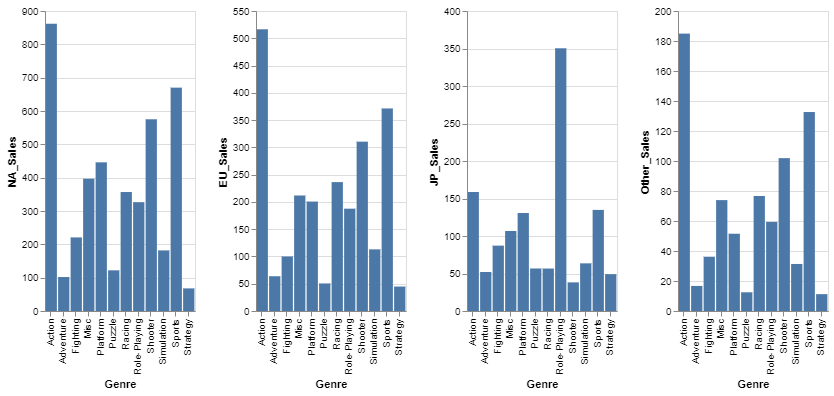

In [13]:
a = alt.Chart(df).mark_bar().encode(
    y = 'NA_Sales',
    x = 'Genre').properties(width=150)
b = alt.Chart(df).mark_bar().encode(
    y = 'EU_Sales',
    x = 'Genre').properties(width=150)
c = alt.Chart(df).mark_bar().encode(
    y = 'JP_Sales',
    x = 'Genre').properties(width=150)
d = alt.Chart(df).mark_bar().encode(
    y = 'Other_Sales',
    x = 'Genre').properties(width=150)

a | b | c | d 

Setelah melihat fakta bahwa genre Action adalah genre dengan penjualan terbanyak, kita dapat melihat dari segi penjualannya di bebrapa negara. Genre Action menjadi genre dengan total penjualan terbanyak di North America, Europe dan Negara lainnya selain negara Jepang. Dalam kurun waktu dari tahun 1980 sampai dengan 2016 pada North America, game dengan genre action sudah terjual sebanyak lebih dari 800 juta eksemplar. Berbeda dengan negara sebelumnya, di Jepang penjualan game terbanyak justru terdapat pada genre game Role Playing. Jika ditelusuri, genre role-playing tidak membutuhkan waktu yang lama untuk populer di negara Jepang. Genre ini cukup diminati oleh para developer game dan oleh gamers sendiri di negara Jepang. Sebut saja game Final Fantasy yang melejit pada tahun 2006. Final Fantasy sendiri telah terjual lebih dari 100 juta copy, dan memegang 7 buah Guinness World Record.

###### Total Penjualan Video Game per Tahun

In [14]:
year=list(vgame.Year.unique())
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]
global_sales=[]
for i in year:
    val=vgame[vgame.Year==i]
    na_sales.append(val.NA_Sales.sum())
    eu_sales.append(val.EU_Sales.sum())
    jp_sales.append(val.JP_Sales.sum())
    other_sales.append(val.Other_Sales.sum())
    global_sales.append(val.Global_Sales.sum())
df_year = pd.DataFrame({"Year":year,"NA_Sales":na_sales,"EU_Sales":eu_sales,"JP_Sales":jp_sales,"Other_Sales":other_sales,"Global_Sales":global_sales})
df_sales_year = pd.melt(df_year,id_vars=['Year'], value_vars = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], var_name='Region',value_name='Sales')

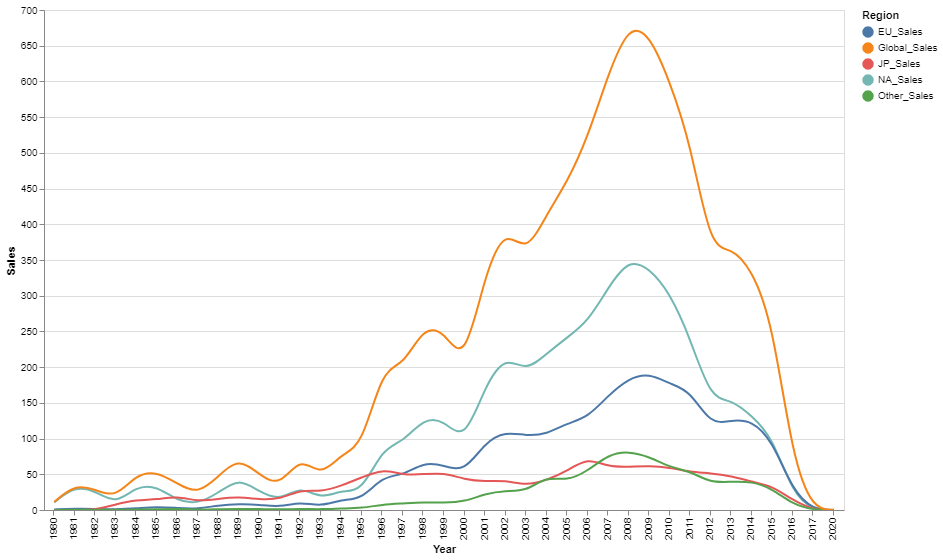

In [15]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Year'], empty='none')
line = alt.Chart(df_sales_year).mark_line(interpolate='basis').encode(
    x='Year:O',
    y='Sales:Q',
    color='Region:N'
)
selectors = alt.Chart(df_sales_year).mark_point().encode(
    x='Year:O',
    opacity=alt.value(0),
).add_selection(
    nearest
)
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Sales:Q', alt.value(' '))
)
rules = alt.Chart(df_sales_year).mark_rule(color='gray').encode(
    x='Year:O',
).transform_filter(
    nearest
)
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=800, height=500
)

Grafik di atas menunjukkan bahwa ada penurunan penjualan setelah tahun 2008. Dapat dilihat pula bahwa di tahun 2008 dan 2009 merupakan puncak penjualan plaing besar di beberapa region, utamanya terlihat pada North America.

###### Top Publisher per Tahun

In [19]:
vg_publisher = vgame.iloc[:,[3,5,10]]
vg_publisher = vg_publisher.groupby(['Year', 'Publisher']).sum().reset_index()
#filter for max by year
vg_publisher_chart = vg_publisher[vg_publisher['Global_Sales'] == vg_publisher.groupby(['Year'])['Global_Sales'].transform('max')]

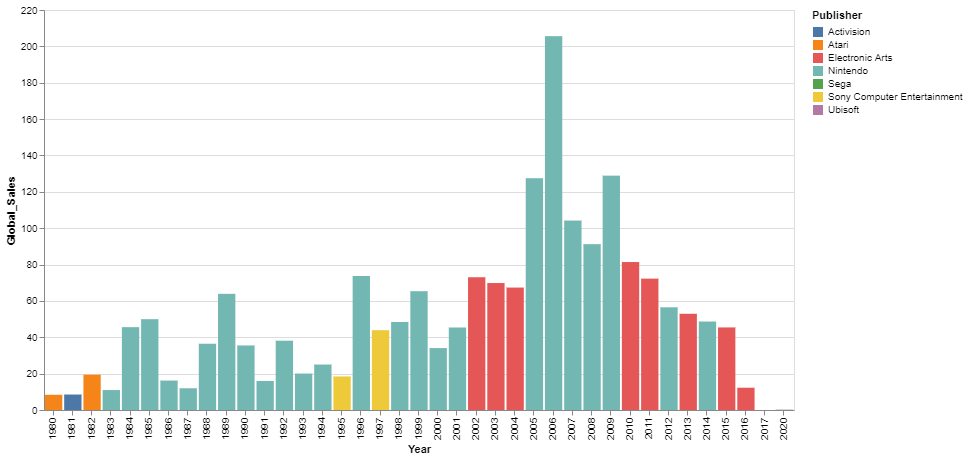

In [20]:
alt.Chart(vg_publisher_chart).mark_bar().encode(
    x='Year:O',
    y="Global_Sales",
    color='Publisher',
    tooltip=['Global_Sales','Publisher']
).properties(width=750, height=400)

Dari grafik di atas kita dapat melihat bahwa Ninetendo menjadi top Publisher yang paling mendominasi per tahunnya untuk penjualan video game di seluruh dunia bahkan Ninetendo secara berurutan pernah menjadi top Publisher penjualn video game lebih dari 1 dekade. Selain itu, publisher yang menjadi top publisher di peringkat ke 2 adalah EA.

###### Top Genre per Tahun

In [21]:
vg_genre = vgame.iloc[:,[3,4,10]]
vg_genre = vg_genre.groupby(['Year', 'Genre']).sum().reset_index()
#filter for max by year
vg_genre_chart = vg_genre[vg_genre['Global_Sales'] == vg_genre.groupby(['Year'])['Global_Sales'].transform('max')]

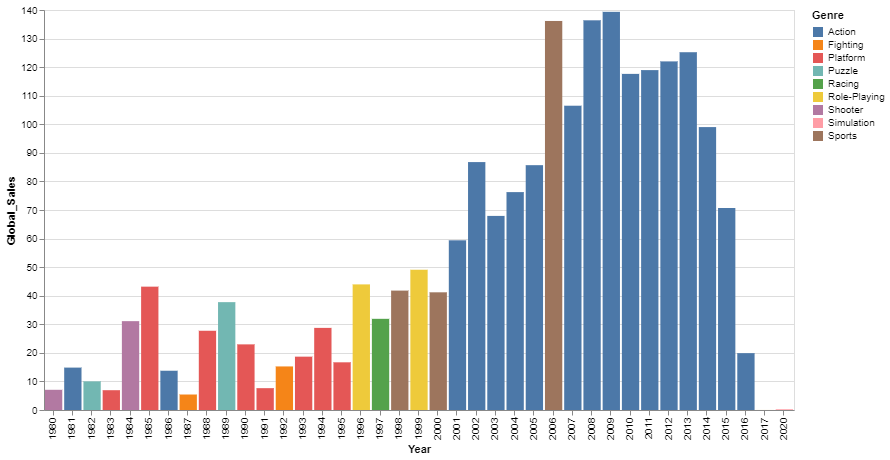

In [22]:
alt.Chart(vg_genre_chart).mark_bar().encode(
    x='Year:O',
    y="Global_Sales",
    # The highlight will be set on the result of a conditional statement
    color='Genre',
    tooltip=['Global_Sales','Genre']
).properties(width=750, height=400)

Dari grafik di atas, kita dapat melihat bahwa game dengan genre Action cukup mendominasi di 16 tahun terakhir. Penjualan video game bergenre Action mulai diminati pada tahun 2001 dan menunjukkan trend penjualan naik hingga mencapai puncak pada tahun 2009. Setelah tahun 2009, genre Action tetap menjadi genre dengan total penjualan terbanyak setiap tahunnya namun kali ini trend penjualannya cenderung turun. Jika dilihat, pada tahun 2006 genre Sports sempat menjadi genre yang terjual paling banyak di seluruh dunia. 

###### Top Platform per Tahun

In [23]:
vg_platform = vgame.iloc[:,[2,3,10]]
# STEP 1: sum by year + month
vg_platform = vg_platform.groupby(['Year', 'Platform']).sum().reset_index()

# STEP 2: filter for max by year
vg_platform_chart = vg_platform[vg_platform['Global_Sales'] == vg_platform.groupby(['Year'])['Global_Sales'].transform('max')]

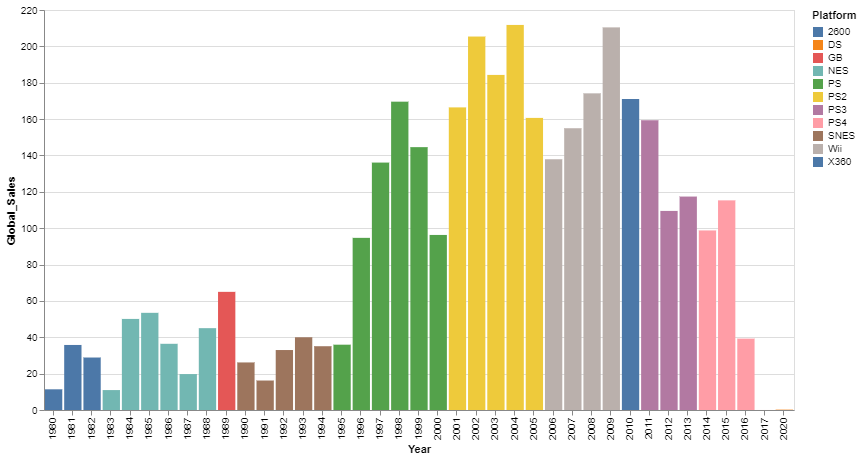

In [24]:
alt.Chart(vg_platform_chart).mark_bar().encode(
    x='Year:O',
    y="Global_Sales",
    # The highlight will be set on the result of a conditional statement
    color='Platform',
    tooltip=['Global_Sales','Platform']
).properties(width=750, height=400)

Di zaman yang serba canggih ini, tak hanya perangkat gadget saja yang berkembang. Dunia hiburan seperti game juga ikut berkembang. Apalagi dengan semakin canggihnya perangkat yang ditawarkan, para pengembang pun juga membuat game yang semakin detail dan semakin seru untuk dimainkan. Dalam dunia game sendiri terdapat berbagai macam jenis game yang bisa dimainkan di berbagai platform. Jika melihat grafik di atas, sejarah dan eksistensi sebuah platform dapat dilihat dari total penjualan setiap tahunnya. Akan tetapi jika dilihat sejarah munculnya sebuah platform game dimana platform yang paling baru lebih baik fiturnya dan lebih canggih dari platform sebelumnya maka hal ini akan menjadi sebuah fakta bahwa di tahun selanjutnya platform terbaru akan menggantikan eksistensi dan mempengaruhi total penjualan sebuah video game dari platform game sebelumnya. Saya dapat memberikan contoh seperti kemunculan platform game PS4 pada tahun 2014 menjadikan platform tersebut lebih diminati dari platform sebelumnya yaitu PS3 dan menggeser total penjualan video game pada platform PS3. 